# Usual Package Imports

In [70]:
first_time = 0

In [50]:
import networkx as nx, numpy as np, matplotlib.pyplot as plt, re, yaml,sys, shelve
import graphutils as gutils, make_graph_dict as mkgraph
from datetime import datetime,date
from collections import defaultdict
from functools import reduce
from importlib import reload
today = re.sub('-','_',str(date.today()))
today,nx.__version__

('2020_04_27', '2.4')

In [35]:
WRITE = False

# Change Directory - Revise for your file system.

In [36]:
s = %pwd
if not re.search('Downloads$',s):
    %cd Downloads

## Open a shelve and load a graph and a term dictionary

In [100]:
with shelve.open('definitions') as f:
    graphdict = dict([(k,v) for k,v in f.items()])
print(graphdict.keys())

dict_keys(['graph', 'term_dictionary', 'termdefdict', 'acrodict', 'racrodict', 'formuladict'])


In [106]:
term = 'Senior Reduction Amount'
term0 = 'Tranche Write-up Amount' # a second term
g.in_edges(term)
baseobjs = [graphdict[k] for k in 'graph term_dictionary termdefdict acrodict racrodict formuladict'.split()]
graph,termdict,termdefdict,acrodict,racrodict,formuladict = baseobjs

In [120]:
print('\n\n-----\n\n'.join([str(obj[term]) for obj in (acrodict,termdict,termdefdict,formuladict)]))

SenRedAm

-----

[(1823, 'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.')]

-----

Senior Reduction Amount: Related Definitions The "Senior Reduction Amount" with respect to any Payme

In [121]:
g = graph.copy()

In [122]:
graph.__dict__.keys()

dict_keys(['graph_attr_dict_factory', 'node_dict_factory', 'node_attr_dict_factory', 'adjlist_outer_dict_factory', 'adjlist_inner_dict_factory', 'edge_attr_dict_factory', 'graph', '_node', '_adj', '_pred', '_succ'])

In [123]:
list(g.in_edges('Senior Reduction Amount'))

[('Payment Date', 'Senior Reduction Amount'),
 ('Recovery Principal', 'Senior Reduction Amount'),
 ('Unscheduled Principal', 'Senior Reduction Amount'),
 ('Scheduled Principal', 'Senior Reduction Amount'),
 ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'),
 ('Delinquency Test', 'Senior Reduction Amount')]

In [124]:
termdict['Credit Event Net Gain']
termdict['Senior Reduction Amount']

[(1823,
  'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.')]

# Eliminate Unecessary Nodes

In [125]:
with open('nodes2delete.txt') as f: # background on how I selected these on request
    xnodes = f.read().split(' ; ')
xnodes

['Reference Pool',
 'Dealer',
 'BofA Merrill',
 'Warrant',
 'Euroclear',
 'Reference Obligations',
 'Closing Date',
 'Participants',
 'Clearstream',
 'Group 1 Notes',
 'Dealer Agreement',
 'Indirect Participants',
 'Group Termination Date',
 'Note Owners',
 'Group 1 Termination Date',
 'Wells Fargo',
 'Euroclear Participants',
 'JP Morgan']

In [126]:
for n in xnodes:
    g.remove_node(n)
    print('removed node %s' % n)

removed node Reference Pool
removed node Dealer
removed node BofA Merrill
removed node Warrant
removed node Euroclear
removed node Reference Obligations
removed node Closing Date
removed node Participants
removed node Clearstream
removed node Group 1 Notes
removed node Dealer Agreement
removed node Indirect Participants
removed node Group Termination Date
removed node Note Owners
removed node Group 1 Termination Date
removed node Wells Fargo
removed node Euroclear Participants
removed node JP Morgan


# Draw Graph

In [127]:
reload(gutils)
GU = gutils.GraphUtils
acro = gutils.acro

In [128]:
acro('',reset = 1) # empty the cache
acrodict = dict([k,acro(k)] for k in termdict.keys()) # a dcitionary
racrodict = dict(((v,k) for k,v in acrodict.items()))
list(acrodict.items())[:5]#,racrodict['RCRNot']

[('RCR Notes', 'RCRNot'),
 ('Exchangeable Notes', 'ExcNot'),
 ('Dealer', 'De'),
 ('Additional Information', 'AddInf'),
 ('Qualified Institutional Buyers', 'QuInsBuy')]

In [142]:
sra,mcet,rprp,twua = [acrodict[k] for k in 'Senior Reduction Amount;Minimum Credit Enhancement Test;Recovery Principal;Tranche Write-up Amount'.split(';')]
sra,mcet,rprp,twua

('SenRedAm', 'MinCrEnhTes', 'RecPr', 'TrWrAm0')

In [143]:
graphs = {}
for k in (sra,mcet,rprp,twua):
    graphs[k] = GU.traceback(g,racrodict[k],num=1)

In [144]:
def draw_g(g,sz = (15,10)):
    plt.figure(1,figsize=sz)
    nx.draw_networkx(g)
    plt.show()

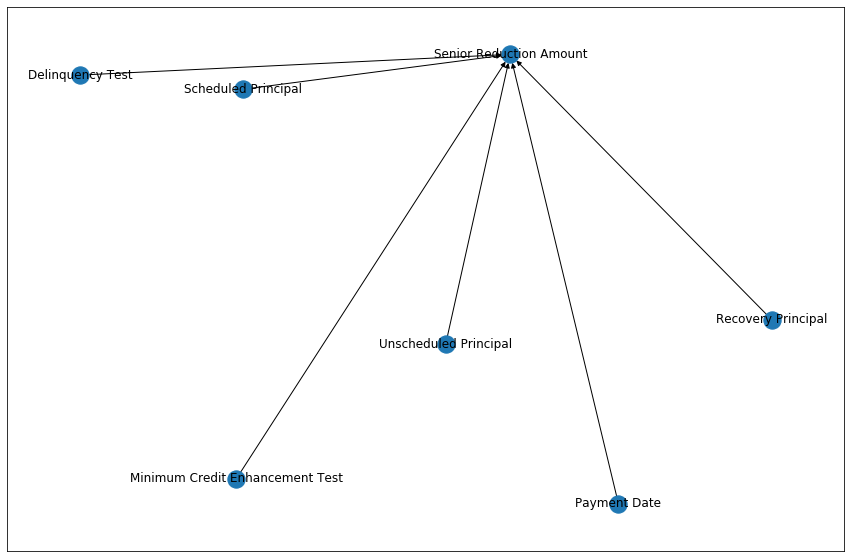

In [145]:
draw_g(graphs[sra])

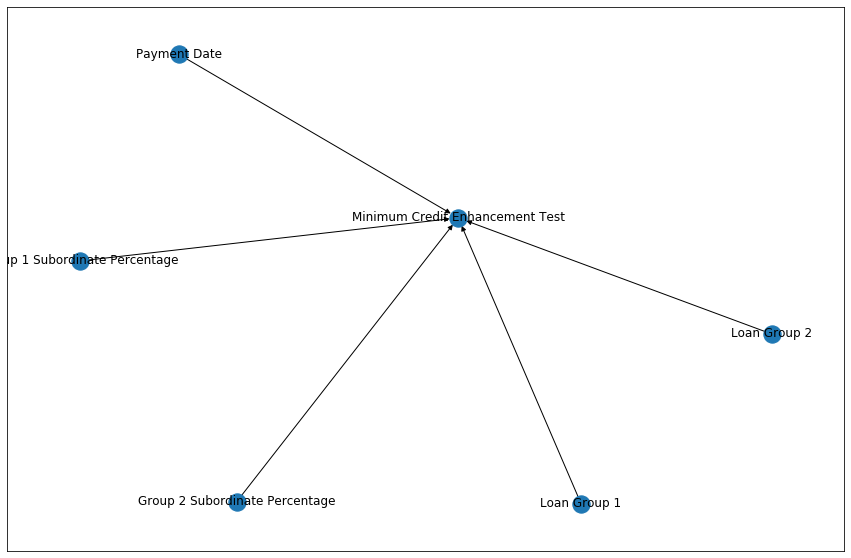

In [146]:
draw_g(graphs[mcet])

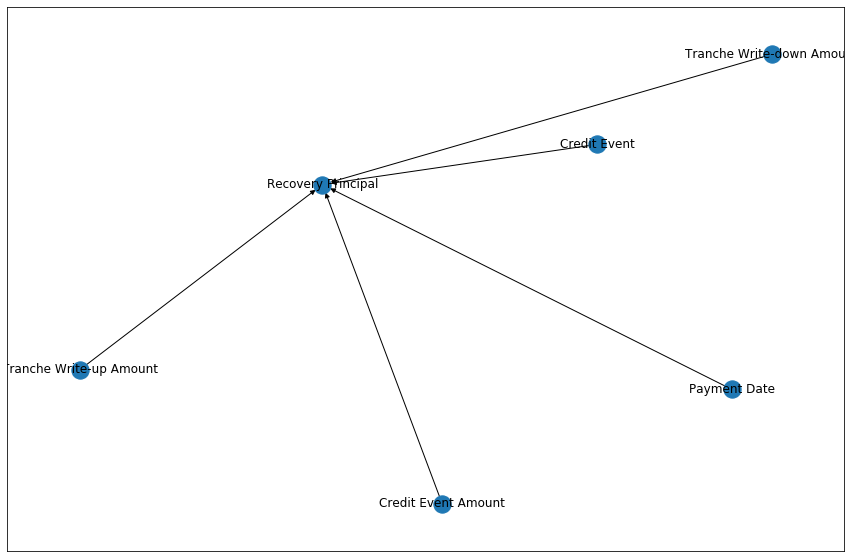

In [147]:
draw_g(graphs[rprp])

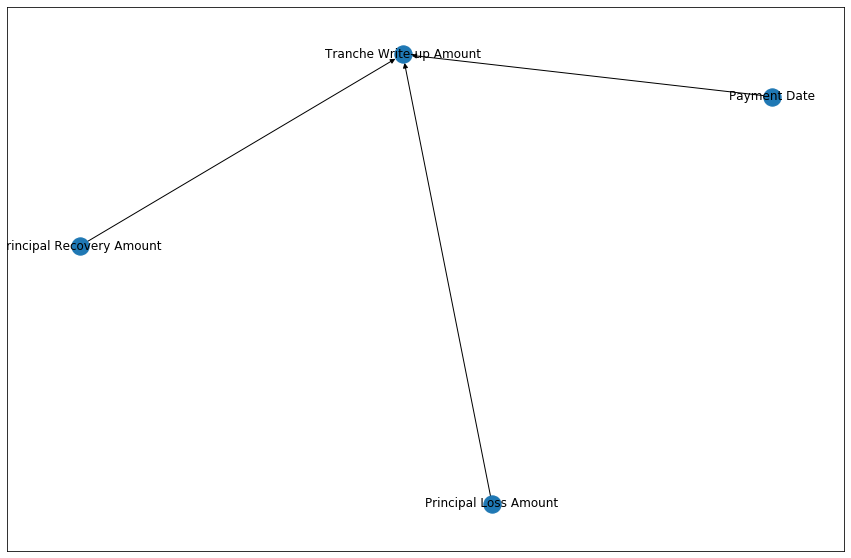

In [148]:
draw_g(graphs[twua])

In [99]:
termdict['Minimum Credit Enhancement Test'],termdict['Group 1 Subordinate Percentage'],termdict['Group 1 Senior Percentage']

([(1839,
   'The "Minimum Credit Enhancement Test" with respect to any Payment Date and Loan Group is a test that will be satisfied if: (i)in the case of Loan Group 1, the Group 1 Subordinate Percentage (solely for purposes of such test, rounded to the sixth decimal place) is greater than or equal to 4.750000%, and (ii)in the case of Loan Group 2, the Group 2 Subordinate Percentage (solely for purposes of such test, rounded to the sixth decimal place) is greater than or equal to 4.750000%.')],
 [(1827,
   'The "Group 1 Subordinate Percentage" with respect to any Payment Date and the Group 1 Notes is the percentage equal to 100% minus the Group 1 Senior Percentage for such Payment Date.')],
 [(1825,
   'The "Group 1 Senior Percentage" with respect to any Payment Date and the Group 1 Notes, is the percentage equivalent of a fraction, the numerator of which is the Class Notional Amount of the Class 1A-H Reference Tranche immediately prior to such Payment Date and the denominator of which 

## Test the Graph

In [134]:
term = 'Senior Reduction Amount'
term0 = 'Tranche Write-up Amount' # a second term
g.in_edges(term)

InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')])

In [135]:
[(edge[0],termdict[edge[0]]) for edge in g.in_edges('Senior Reduction Amount')]

[('Payment Date',
  [(555,
    'Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").'),
   (1712,
    'Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of the preceding month of such Payment Date in the case of Definitive Notes (the "Record Date").')]),
 ('Recovery Principal',
  [(1836,
    '"Recovery Principal" with respect to any Payment Date and Loan Group is the sum of: (i) the excess, if any, of 

# Import our Custom Code for Tracing Back Definitions through other Definitions

In [16]:
import graphutils
reload(graphutils)
gutils = graphutils.GraphUtils

## Test Traceback

In [17]:
ar = []
lst = lambda x: ar.append(x)
lg = gutils.traceback(g.copy(),term0,num=5,it=0,f=lst)
print(len(lg.edges()),len(g.edges()),len(g.in_edges('Tranche Write-up Amount')))
#lg = gutils.traceback(g.copy(),'Senior Reduction Amount',num=3)
#draw_g(lg)
g.in_edges(term0),termdict[term0]

66 761 3


([('Principal Recovery Amount', 'Tranche Write-up Amount'),
  ('Payment Date', 'Tranche Write-up Amount'),
  ('Principal Loss Amount', 'Tranche Write-up Amount')],
 [(1876,
   'Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.')])

In [18]:
ar.sort()
ar

[(0, 'Payment Date'),
 (0, 'Principal Loss Amount'),
 (0, 'Principal Recovery Amount'),
 (1, 'Book-Entry Notes'),
 (1, 'Business Day'),
 (1, 'Credit Event'),
 (1, 'Credit Event Net Gain'),
 (1, 'Credit Event Net Loss'),
 (1, 'Credit Event Reference Obligation'),
 (1, 'Definitive Notes'),
 (1, 'Liquidation Proceeds'),
 (1, 'Modification Loss Amount'),
 (1, 'Net Liquidation Proceeds'),
 (1, 'Period'),
 (1, 'Record Date'),
 (1, 'Reference Obligations'),
 (1, 'Reporting Period'),
 (1, 'Warrant'),
 (2, 'Clearstream'),
 (2, 'Credit Event UPB'),
 (2, 'Current Accrual Rate'),
 (2, 'Cut-off Date'),
 (2, 'Euroclear'),
 (2, 'Group Termination Date'),
 (2, 'Mortgage Insurance Credit Amount'),
 (2, 'Note Owners'),
 (2, 'Reference Pool'),
 (2, 'Treasury'),
 (2, 'Wells Fargo'),
 (2, 'Wells Fargo Bank'),
 (3, 'Barclays'),
 (3, 'BofA Merrill'),
 (3, 'Citigroup'),
 (3, 'Clearstream International'),
 (3, 'Credit Suisse'),
 (3, 'Dealer'),
 (3, 'Dealer Agreement'),
 (3, 'Dealers'),
 (3, 'Euroclear Particip

In [19]:
term0,termdict[term0]

('Tranche Write-up Amount',
 [(1876,
   'Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.')])

# A sketch of "memoizing"

In [20]:
def memo(f):
    """Decorator that caches the return value for each call to f(args).
    Then when called again with same args, we can just look it up."""
    cache = {}
    def _f(*args):
        try:
            if args in cache: print("found it")
            return cache[args]
        except KeyError:
            cache[args] = result = f(*args)
            return result
        except TypeError:
            # some element of args can't be a dict key
            return f(args)
    return _f
@memo # f = memo(f) = _f
def f(x):return x*2
f(3)
f(3)

found it


6

# Converting definition lists to readable text and to formulae

# A General Recursion with an (Ac)Cumulator

In [21]:
# decorate a function (see below) with an (ac)cumulator
# control the number of recursion with limit = num
# include a function newargs_ for generating new arguments from the old args
def decf(f,newargs_,cum = None,num=2, it = 0):
    cum = cum or [] # cum is the accumulation of the recursion
    def f_(*args,num=num,it=it):
        #print('args',args) # DEBUG
        cum.append(f(*args)) # cache the result of f applied to the arguments
        if it <= num: # recurse if under the limit
            newargs = newargs_(*args)
            for args in newargs:
                f_(*args,num=num,it=it+1)
    return f_,cum

# A toy example with trivial functions as arguments
# We need to have access to the cumulator so the decorator returns it 
func,cum = decf(lambda x: x, lambda x: ([x+1],))
print(cum) # empty
func(0)
print(cum )
func(0)
print(cum)
# the accumulator is persistent
print(cum) # accumulator
func,cum = decf(lambda x: x, lambda x: ([x+1],))
# the (only) way to get a new accumulator
func(0)
print(cum)

[]
[0, 1, 2, 3]
[0, 1, 2, 3, 0, 1, 2, 3]
[0, 1, 2, 3, 0, 1, 2, 3]
[0, 1, 2, 3]


In [22]:
dlm = (': ',', ','\n') # various delimiters for use in string formation

## Turn a definition into a string

In [23]:
get_def = lambda term,g=g,dct = termdict: dlm[0].join((term, dlm[-1].join((tpl[1] for tpl in dct[term]))))
get_def(term0)

'Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.'

In [39]:
get_def('Tranche Write-up Amount')

'Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.'

## Indent the definition string for readability

In [47]:
# indent based on level
get_def_indent = lambda x,indent=0: '\t'*indent + get_def(x)
get_def_indent(term0,2)

'\t\tTranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.'

## Using the recursion to write an indented dictionary of terms

In [41]:
func,cum = decf(get_def_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in g.in_edges(term)))
print(cum) # empty cumulator
func(term, 0,num = 0) # fill it
cum[:5]

[]


['Senior Reduction Amount: Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.',
 '\tDelinquency Test: The "Delinquency Test" for any Payment Date and Loan Group is a test that will be sati

In [42]:
# using the recursion 
func,cum = decf(get_def_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in g.in_edges(term)))
print(cum)
func(term0,0)
cum[:5]

[]


['Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.',
 '\tPrincipal Recovery Amount: The "Principal Recovery Amount" with respect to any Payment Date and Loan Group is the sum of: (a) the aggregate amount of Credit Event Net Losses for all Reversed Credit Event Reference Obligations in such Loan Group for the related Reporting Period; (b) subsequent recoveries on any Reference Obligation in such Loan Group that became a Credit Event Reference Obligation on a prior Payment Date and with respect to which Net Liquidation Proceeds have already been determined; (c) the aggregate amount of the Credit Event Net Gains of all Credit Event Reference Obligations in such Loan Group for the related Reporting Period; and (d) the aggregate amount of Rep and Warranty Set

In [25]:
if 0 or WRITE: # Writing a term dictionary with indented definitions: execute by replace 0 with 1
    with open('term_dict.txt','w') as f:
        for line in cum: f.write(line+"\n")

## Using the recursion to write a series of indented dependent formulae

In [26]:
termdict[term0]

[(1876,
  'Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.')]

In [27]:
#How to make a tentative formula, for editing and encoding
get_formula = lambda term,line=False,g=g: dlm[0].join((gutils.acro(term),'['+term+']')) + dlm[0] +'('+ dlm[1].join((gutils.acro(edge[0]) 
                                                        for edge in g.in_edges(term)) )+')'+ ("\n" if line else '')
get_formula(term0,1)

'TrWrAm: [Tranche Write-up Amount]: (PrRecAm, PayDat, PrLosAm)\n'

TrWrAm: [Tranche Write-up Amount]: max(PrRecAm - PrLosAm,0)



## How the formula works

TrWrAm: [Tranche Write-up Amount]: max (PrRecAm - PrLosAm,0)

Suppose PrRecAm, PrLosAm = 10,5

Then TrWrAm = max( 10 - 5,0) = 5

But suppose  PrRecAm, PrLosAm = 5,10

Then TrWrAm = max(5 - 10 ,0) = 0

In [28]:
# for easier reading, we indent
get_formula_indent = lambda x,indent=0: '\t'*indent + get_formula(x)
get_formula_indent(term0,2)

'\t\tTrWrAm: [Tranche Write-up Amount]: (PrRecAm, PayDat, PrLosAm)'

In [29]:
# set up temporary formulae for all definitions needed for term = Tranche Write-up Amount
func,cum_form = decf(get_formula_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in g.in_edges(term)))
func(term0,0)

In [30]:
# write a formula dictionary: execute by replace 0 with 1
if 0:
    with open('formula_dict.txt','w') as f:
        for line in cum_form: f.write(line+"\n")

# Revising Graph - Delete nodes for terms not used in formulae 

We've seen some nodes, like Credit Event which, although important, do not appear in formulae.  We want to delete them systematically from our graph for purposes of creating the formulae which will become our pseudocode.  This will allow us to delete once, and have the deletion propogate through all our definitions, which is a benefit of starting with a graph.

In [31]:
cleangraph = graph.copy() # want to preserve the original for future reference.

terms2delete = 'Reference Obligations;Reference Pool;Clearstream;Group 2 Termination Date;Participants'.split(';')
terms2delete += 'Global Agency Agreement;Wells Fargo Bank;Treasury;BofA Merrill;Group 1 Notes'.split(';')
terms2delete += 'Group Termination Date; Indirect Participants;Euroclear Participants'.split(';')
terms2delete += 'Closing Date;Note Owners;Dealer;Dealer Agreement;Warrant;Wells Fargo'.split(';')
terms2delete += 'Credit Suisse;JP Morgan;Barclays;Clearstream International'.split(';')
terms2delete +='Citigroup;Euroclear;Group 1 Termination Date'.split(';')
terms2delete+= 'Liquidation Proceeds;Credit Event;Payment Date;Business Day;Reporting Period;Period;Credit Event Reference Obligation'.split(';')

print(len(cleangraph))

for term_ in terms2delete:
    if term_ in cleangraph.nodes():
        print("Removing node %s" % term_)
        cleangraph.remove_node(term_)
print(len(cleangraph))

192
Removing node Reference Obligations
Removing node Reference Pool
Removing node Clearstream
Removing node Group 2 Termination Date
Removing node Participants
Removing node Global Agency Agreement
Removing node Wells Fargo Bank
Removing node Treasury
Removing node BofA Merrill
Removing node Group 1 Notes
Removing node Group Termination Date
Removing node Euroclear Participants
Removing node Closing Date
Removing node Note Owners
Removing node Dealer
Removing node Dealer Agreement
Removing node Warrant
Removing node Wells Fargo
Removing node Credit Suisse
Removing node JP Morgan
Removing node Barclays
Removing node Clearstream International
Removing node Citigroup
Removing node Euroclear
Removing node Group 1 Termination Date
Removing node Liquidation Proceeds
Removing node Credit Event
Removing node Payment Date
Removing node Business Day
Removing node Reporting Period
Removing node Period
Removing node Credit Event Reference Obligation
160


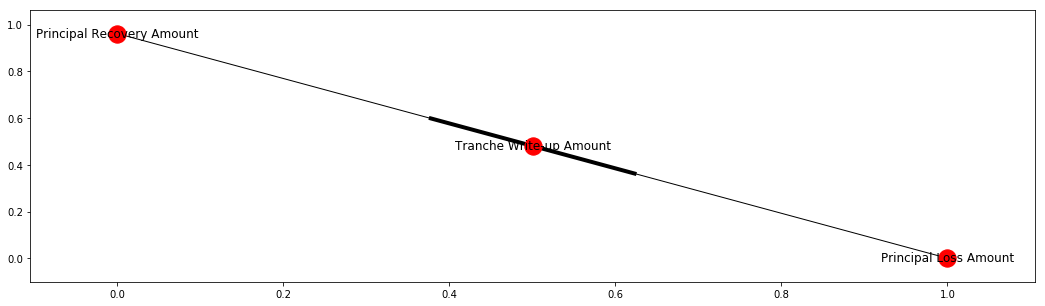

In [32]:
make_draw_graph(term0,cleangraph,(18,5))

## Set up some automated acronyms for easy reading

In [33]:
def nocollision(f):
    cache = []
    # this time, we allow ourselves to clear the cache manually
    def _f(arg,reset=False):
        if reset: 
            cache.clear()
            return
        #print(cache)
        i = 0
        baseresult = f(arg)
        result = baseresult
        while result in cache:
            assert i < 100, 'Problems with arg %s, f(arg) %s, and i %i' %(arg,result,i)
            #print(result)
            result = baseresult + str(i)
            i+=1
        cache.append(result)
        return result
    return _f
print(term0)

@nocollision
def acro(term): return gutils.acro(term)

print([acro(term_) for term_ in 'Principal Amount;Private Amount;Press Amonia'.split(';')])
print([acro(term_) for term_ in 'Principal Amount;Private Amount;Press Amonia'.split(';')])
acro(term0,1) # resets ('clears') the cache to an empty list
print([acro(term_) for term_ in 'Principal Amount;Private Amount;Press Amonia'.split(';')])

Tranche Write-up Amount
['PrAm', 'PrAm0', 'PrAm1']
['PrAm2', 'PrAm3', 'PrAm4']
['PrAm', 'PrAm0', 'PrAm1']


## Make an acronym dictionary and reverse dictionary.

In [34]:
acro('',reset = 1) # empty the cache
acrodict = dict([k,acro(k)] for k in termdict.keys()) # a dcitionary
racrodict = dict(((v,k) for k,v in acrodict.items()))
list(acrodict.items())[:5]#,racrodict['RCRNot']

[('RCR Notes', 'RCRNot'),
 ('Exchangeable Notes', 'ExcNot'),
 ('Dealer', 'De'),
 ('Additional Information', 'AddInf'),
 ('Qualified Institutional Buyers', 'QuInsBuy')]

In [35]:
len(cleangraph),len(graph)

(160, 192)

In [36]:
term0,'full graph',graph.in_edges(term0),'cleaned graph', cleangraph.in_edges(term0)

('Tranche Write-up Amount',
 'full graph',
 [('Principal Recovery Amount', 'Tranche Write-up Amount'),
  ('Payment Date', 'Tranche Write-up Amount'),
  ('Principal Loss Amount', 'Tranche Write-up Amount')],
 'cleaned graph',
 [('Principal Recovery Amount', 'Tranche Write-up Amount'),
  ('Principal Loss Amount', 'Tranche Write-up Amount')])

In [37]:
cleangraph.in_edges('Credit Event')

[]

In [38]:
# Confirm values 
term = 'Senior Reduction Amount'
term0 = 'Tranche Write-up Amount' # a second term
cleangraph.in_edges(term)

[('Delinquency Test', 'Senior Reduction Amount'),
 ('Scheduled Principal', 'Senior Reduction Amount'),
 ('Unscheduled Principal', 'Senior Reduction Amount'),
 ('Recovery Principal', 'Senior Reduction Amount'),
 ('Minimum Credit Enhancement Test', 'Senior Reduction Amount')]

In [54]:
#How to make a tentative formula, for editing and encoding
get_formula = lambda term,line=False,g=cleangraph: dlm[0].join((gutils.acro(term),'['+term+']')) + dlm[0] +'('+ dlm[1].join((gutils.acro(edge[0]) 
                                                        for edge in g.in_edges(term)) )+')'+ ("\n" if line else '')
print(get_formula(term,1))
print(get_formula(term,1,g=g))
for edge in g.in_edges(term): print(acrodict[edge[0]]," : ", edge[0])
print(('\n' * 2).join((termdict[term][0][1],gutils.acro('Senior Percentage'),termdict['Group 1 Senior Percentage'][0][1])))

get_formula_indent = lambda x,indent=0: '\t'*indent + get_formula(x)
term0, get_formula_indent(term0,2)

SenRedAm: [Senior Reduction Amount]: (DelTes, SchPr, UnsPr, RecPr, MinCrEnhTes)

SenRedAm: [Senior Reduction Amount]: (DelTes, SchPr, UnsPr, PayDat, RecPr, MinCrEnhTes)

DelTes  :  Delinquency Test
SchPr  :  Scheduled Principal
UnsPr  :  Unscheduled Principal
PayDat  :  Payment Date
RecPr  :  Recovery Principal
MinCrEnhTes  :  Minimum Credit Enhancement Test
Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Schedul

('Tranche Write-up Amount',
 '\t\tTrWrAm: [Tranche Write-up Amount]: (PrRecAm, PrLosAm)')

In [101]:
func,cum_form = decf(lambda x: x, lambda x: ([x+1],))
print(cum_form)

[]


In [102]:
func,cum_form = decf(get_formula_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in cleangraph.in_edges(term)))
func(term0,0)
cum_form[:3]

['TrWrAm: [Tranche Write-up Amount]: (PrRecAm, PrLosAm)',
 '\tPrRecAm: [Principal Recovery Amount]: (CrEvNetGa, NetLiqPr, CrEvNetLos)',
 '\t\tCrEvNetGa: [Credit Event Net Gain]: (CrEvUPB, NetLiqPr, CurAccRat)']

## Write the pre-formula to file

In [106]:
if 1:
    with open('formula_dict_clean0.txt','w') as f:
        for line in cum_form: f.write(line+"\n")

## Check that empty formulae should be empty

In [104]:
for term_ in 'LiqPr CrEvUPB LiqPr'.split():
    print(termdict[racrodict[term_]])

[(1856, 'The "Liquidation Proceeds" with respect to a Credit Event Reference Obligation represent all cash amounts (including sales proceeds, net of selling expenses) received in connection with the liquidation of the Credit Event Reference Obligation.')]
[(1854, 'The "Credit Event UPB" with respect to any Credit Event Reference Obligation is the unpaid principal balance thereof as of the end of the Reporting Period related to the Payment Date that it became a Credit Event Reference Obligation.')]
[(1856, 'The "Liquidation Proceeds" with respect to a Credit Event Reference Obligation represent all cash amounts (including sales proceeds, net of selling expenses) received in connection with the liquidation of the Credit Event Reference Obligation.')]


In [108]:
get_formula('LiqPr')

'Liq: [LiqPr]: ()'

In [105]:
termdict[racrodict['ModEv']]

[(1857,
  'A "Modification Event" with respect to any Reference Obligation is a forbearance or certain mortgage rate modifications relating to such Reference Obligation, it being understood that in the absence of a forbearance or certain mortgage rate modifications, a term extension on a Reference Obligation will not constitute a Modification Event.'),
 (1858,
  'In addition, a mortgage rate modification that results in an increased mortgage rate with respect to any Reference Obligation (after giving effect to all scheduled mortgage rate modifications thereon) will not constitute a "Modification Event." For example, in the case of a mortgage rate modification that provides for a mortgage rate reduction from 4% to 2% followed by a future step-up in the mortgage rate from 2% to 5%, the modification will not be treated as a "Modification Event." By contrast, in the case of a mortgage rate modification that provides for a mortgage rate reduction from 4% to 2% followed by a future step-up i

In [107]:
get_formula('ModEv')

'Mod: [ModEv]: ()'